In [1]:
import os
import netCDF4 as nc
import numpy as np
from statistics import mean
from decimal import Decimal
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import matplotlib.patches as patches

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
import math
import random
from scipy.spatial.distance import cdist
from numpy import array
from matplotlib import path

In [67]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
files=['Зима2019.npy','Весна2019.npy','Лето2019.npy','Осень2019.npy']

In [7]:
for file in files:
    DATA = np.load(file)
    data_anom, list_anom=generator(DATA, 0.05, 30,5, 50, 100, 50)
    np.save(f'{file}_anom_sigma50', data_anom)

(1728730,)
1728730
(1728730,)
(886156,)
886156
(886156,)
(900683,)
900683
(900683,)
(1772312,)
1772312
(1772312,)


In [4]:
def generator (data, k, sred_anom_dlina,sigma_dlina, const_min, const_max, sigma):
    n_total= data.shape[0]*data.shape[1]*data.shape[2]
    n_anom=round(n_total*k)
    N=round(n_anom/sred_anom_dlina)
    vse_dliny = np.random.normal(sred_anom_dlina,sigma_dlina, N)
    const = np.random.uniform(const_min,const_max,N)
    print(vse_dliny.shape)
    print(N)
    print(const.shape)
    
    anomalii_list=[]
    i=0
    for z in vse_dliny:
        chislo_schet=random.randint(1,3)
        if (chislo_schet == 1):
            chislo=random.randint(0, data.shape[0]-round(z)-1)
            constitution=np.full(shape=round(z),fill_value=const[i])
            list_xy=[]
            x=random.randint(0, data.shape[1]-1)
            y=random.randint(0, data.shape[2]-1)
            list_xy.append(x)
            list_xy.append(y)
            anomalii_list.append(list_xy)
            for const1 in constitution:
                data[chislo,x,y]=const1
                chislo=chislo+1
            i=i+1
            
        if (chislo_schet == 2):
            chislo=random.randint(0, data.shape[0]-round(z)-1)
            constitution=np.full(shape=round(z),fill_value=const[i])
            noise = np.random.normal(0,sigma, round(z))
            noise=noise+constitution
            x=random.randint(0, data.shape[1]-1)
            y=random.randint(0, data.shape[2]-1)
            list_xy=[]
            list_xy.append(x)
            list_xy.append(y)
            anomalii_list.append(list_xy)
            for noi in noise:
                data[chislo,x,y]=noi
                chislo=chislo+1
            i=i+1
        
        if (chislo_schet == 3):
            chislo=random.randint(0, data.shape[0]-round(z)-1)
            constitution=np.full(shape=round(z),fill_value=const[i])
            noise = np.random.normal(0,sigma, round(z))
            noise=noise+constitution
            d1=noise
            for i in range(0,chislo):
                d1=np.insert(d1, 0,0)
            for y in range(0,data.shape[0]-chislo-noise.shape[0]):
                d1=np.append(d1, 0)
            
            
            d1 = d1.reshape(data.shape[0],1,1)
            
            x=random.randint(0, data.shape[1]-1)
            y=random.randint(0, data.shape[2]-1)
            list_xy=[]
            list_xy.append(x)
            list_xy.append(y)
            anomalii_list.append(list_xy)
            
            data[:,x,y]=data[:,x,y]+d1[:,0,0]
            
            i=i+1
            
    return data, anomalii_list
            

In [58]:
list_day=list(range(119))
list111=[]
list222=[]
for c in range(0,9):
    
    list1=[]
    for x in data111[:,list_anom[c][0],list_anom[c][1]]:
        list1.append(x)
        
    list2=[]
    for x in data111_anom[:,list_anom[c][0],list_anom[c][1]]:
        list2.append(x)
        
    list111.append(list1)
    list222.append(list2)
    

C:\Users\rubin\AppData\Local\Temp\ipykernel_1680\2745845970.py:50: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1, l2, l3, l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16,l17,l18],     # The line objects


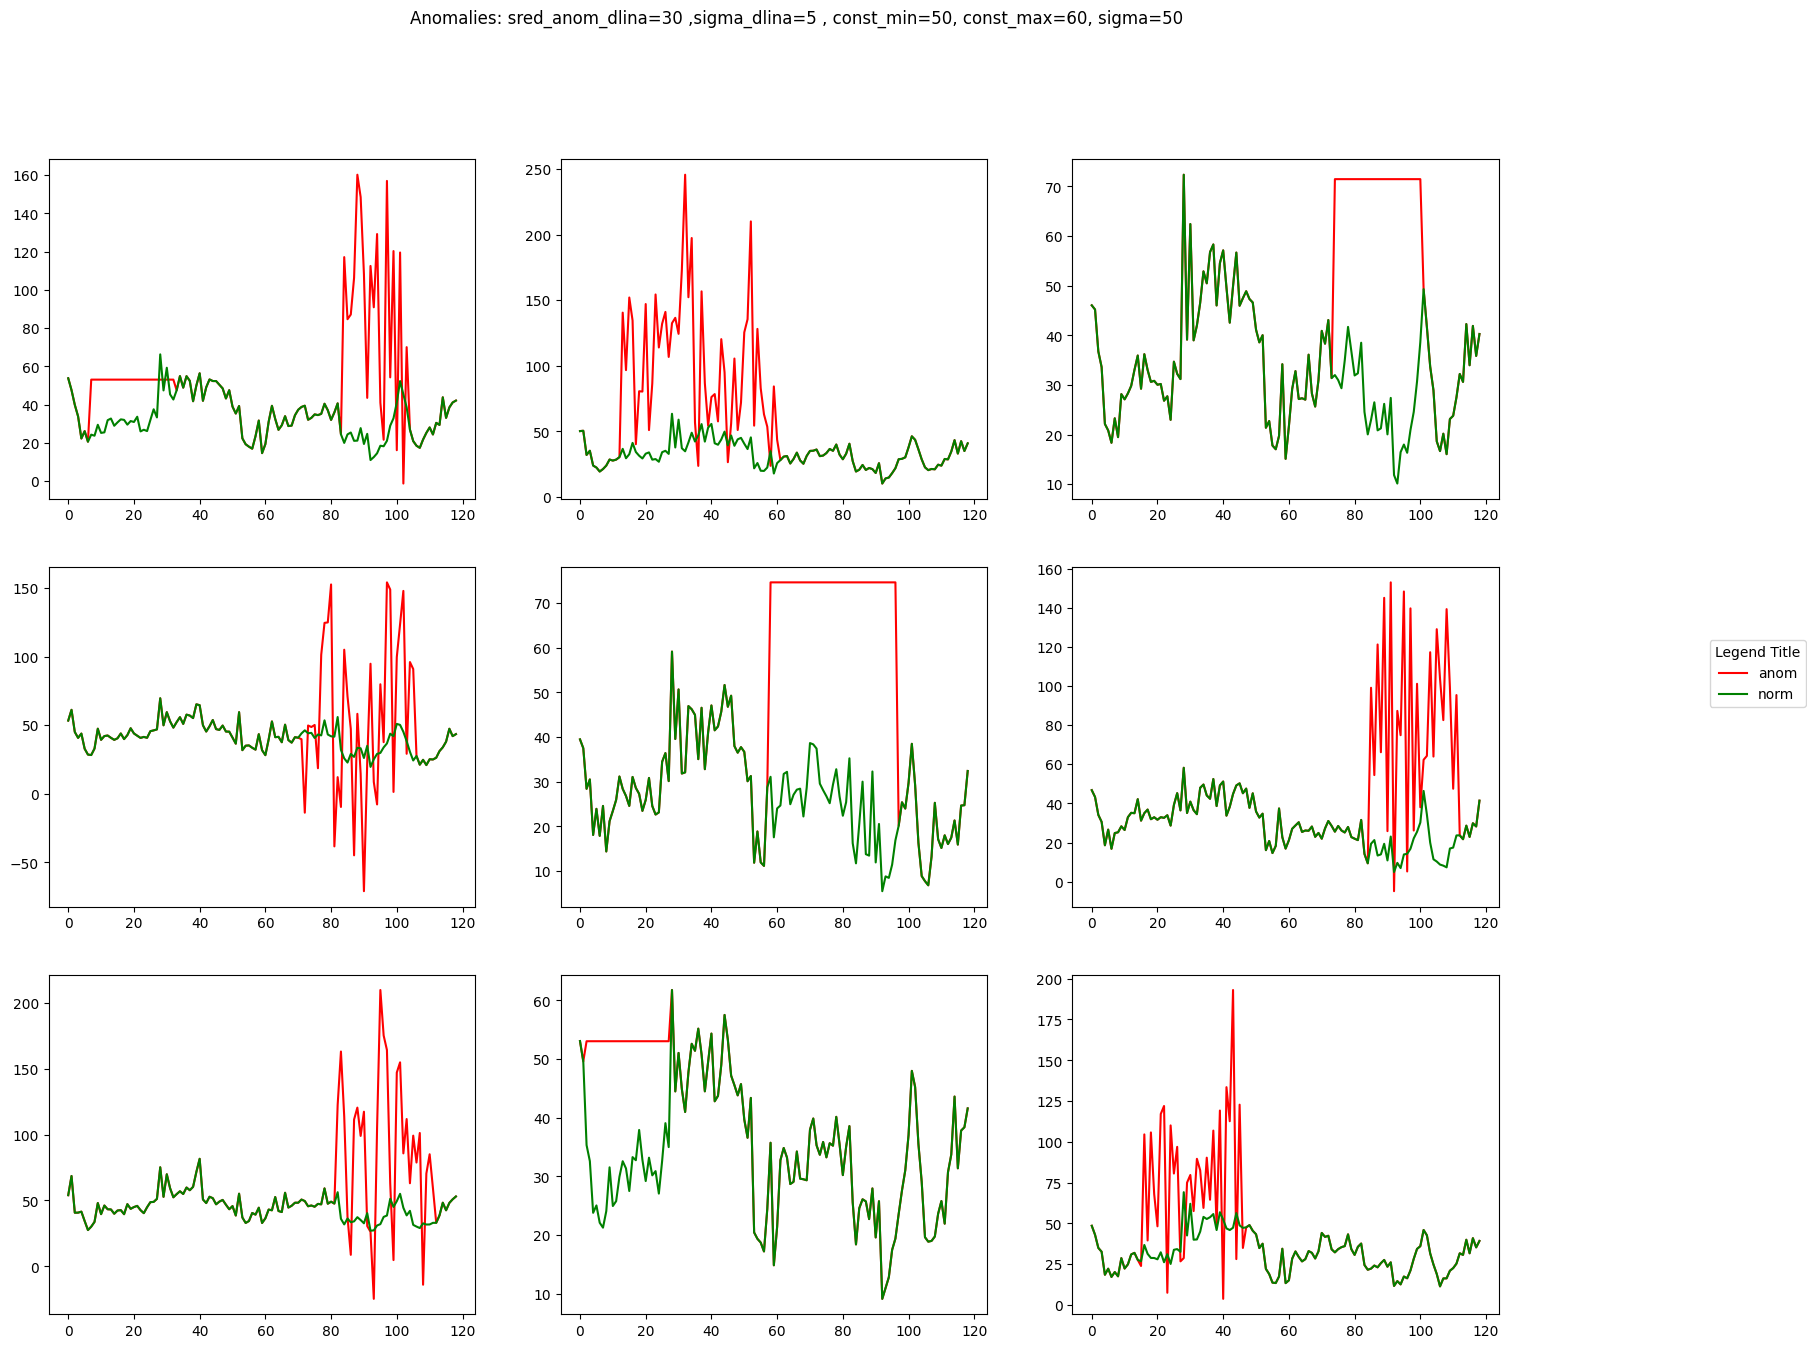

In [59]:
fig, axes = plt.subplots(3, 3, figsize=(20,15))
fig.suptitle('Anomalies: sred_anom_dlina=30 ,sigma_dlina=5 , const_min=50, const_max=60, sigma=50 ')

# The data
ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8,ax9 = axes.flatten()


# Labels to use in the legend for each line
line_labels = ["anom", "norm"]

# Create the sub-plots, assigning a different color for each line.
# Also store the line objects created

l2 = ax1.plot(list_day, list222[0], color="red")[0]
l1 = ax1.plot(list_day, list111[0], color="green")[0]


l4 = ax2.plot(list_day, list222[1], color="red")[0]
l3 = ax2.plot(list_day, list111[1], color="green")[0]


l6 = ax3.plot(list_day, list222[2], color="red")[0]
l5 = ax3.plot(list_day, list111[2], color="green")[0]


l8 = ax4.plot(list_day, list222[3], color="red")[0]
l7 = ax4.plot(list_day, list111[3], color="green")[0]


l10 = ax5.plot(list_day, list222[4], color="red")[0]
l9 = ax5.plot(list_day, list111[4], color="green")[0]


l12 = ax6.plot(list_day, list222[5], color="red")[0]
l11 = ax6.plot(list_day, list111[5], color="green")[0]


l14 = ax7.plot(list_day, list222[6], color="red")[0]
l13 = ax7.plot(list_day, list111[6], color="green")[0]


l16 = ax8.plot(list_day, list222[7], color="red")[0]
l15 = ax8.plot(list_day, list111[7], color="green")[0]

l18 = ax9.plot(list_day, list222[8], color="red")[0]
l17 = ax9.plot(list_day, list111[8], color="green")[0]


# Create the legend
fig.legend([l1, l2, l3, l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16,l17,l18],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Legend Title"  # Title for the legend
           )

# Adjust the scaling factor to fit your legend text completely outside the plot
# (smaller value results in more space being made for the legend)
plt.subplots_adjust(right=0.85)

plt.savefig('sred_anom_dlina=30_sigma_dlina=5_const_min=50_const_max=60_sigma=50.png')
plt.show()
